# <span style="color:blue"> Esercizio 1

# 1.01
   L'obiettivo dell'esercizio è stimare e graficare il valor medio e la relativa incertezza di una variabile pseudo-casuale r che supponiamo essere distribuita uniformemente nell'intervallo $\lbrack 0; 1)$.
   La variabile pseudo-casuale è stata generata attraverso il generatore di numeri casuali parallelo ("Parallel Random Number Generator") fornito.
   La stima dell'incertezza viene effettuata in funzione del numero $N$ di blocchi: proviene dal calcolo dei valori di 
    $$ \langle A^2 \rangle \simeq \frac{1}{N} \sum_{i=1}^N A^2_i \quad \quad \langle A\rangle^2 \simeq \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 $$ come risultati di un esperimento, corrispondente al singolo blocco e infine calcolata come  $$\frac{\sigma}{\sqrt{N-1}} \simeq \sqrt{\frac{1}{N-1} \left[ \frac{1}{N} \sum_{i=1}^N A^2_i - \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 \right]} $$
</p>
 
dove il valore di ognuno degli esperimenti è stato ottenuto con $\frac{M}{N}$ punti, dove M è il numero di punti totali e $N$ il numero di blocchi.
I valori scelti sono $M=10^4$ e $N=10^2$.
Si noti inoltre che dopo un solo esperimento non è possibile avere una stima dell'incertezza, perciò il suo valore è stato settato direttamente a 0. 

In seguito sono riportati i risultati:
 
 
 
 
 
 
 
 

### A. Media
Il valor medio di r è pari a $\langle r \rangle = \int_0^1 r dr = 1/2$. 
Il grafico rappresenta la convergenza del calcolo al valore 0.5 e l'andamento dell'errore statistico in funzione del numero di punti. L'errore statistico diminuisce all'aumentare dei blocchi N. 
Question: <span style="color:red"> 𝑁  can be chosen in many ways ... what are the limitations regarding this choice?

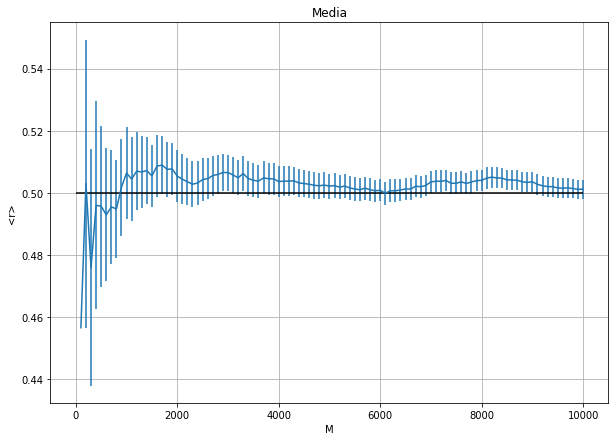

In [1]:
import matplotlib
import matplotlib.pyplot as plt 
import numpy as np

x,y,err=np.loadtxt("ex_1.01/mean.out", usecols=(0, 1, 2), unpack=True)

fig=plt.figure(figsize=(10, 7))
plt.errorbar(x,y,yerr=err)
plt.hlines(0.5, 0, 10000)
plt.xlabel('M')
plt.ylabel('<r>')
plt.title("Media")
plt.grid(True)
plt.show()

### B. Varianza 
 
 Per il calcolo della varianza abbiamo ripetuto lo stesso procedimento utilizzato per il calcolo
    del valore medio, calcolando quindi $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$ e graficato il risultato traslato a zero di una quantità pari a $\frac{1}{12}$

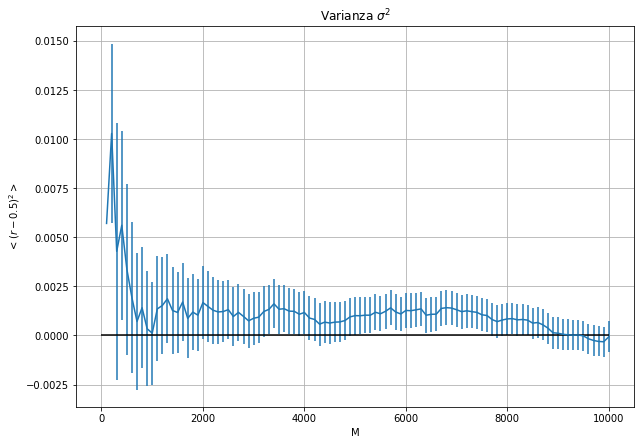

In [2]:
import matplotlib
import matplotlib.pyplot as plt 
import numpy as np

x,y,err=np.loadtxt("ex_1.01/dev.out", usecols=(0, 1, 2), unpack=True)

fig=plt.figure(figsize=(10, 7))
plt.errorbar(x,y,yerr=err)
plt.hlines(0, 0, 10000)
plt.xlabel('M')
plt.ylabel('$<(r-0.5)^2>$')
plt.title("Varianza $\sigma^2$")
plt.grid(True)
plt.show()

### C. $\chi^2$

Infine vogliamo controllare se effettivamente l'ipotesi precedente, ovvero che i valori di $r$ siano distribuiti uniformente, è corretta. Per farlo calcoliamo il valore di $\chi^2$, dal quale si ottiene il livello di confidenza nel rigettare l'ipotesi di distribuzione non uniforme. 
Si è diviso l'intervallo $[0,1)$ in 100 sottointervalli e conteggiato il numero di estrazioni in ogni sottointervallo.
$\chi^2=\sum_{i}\frac{(𝑂𝑖−𝐸𝑖)^2}{𝐸𝑖}$ presenta al denominatore il valore di aspettazione del numero medio di conteggi in ogni intervallo perchè, per probabilità $p$ "piccole", dalla distibuzione binomiale si ricava che $\sigma^2 = np (1-p)$ e perciò si ottiene $\sigma^2 \simeq np$, che è il valore di aspettazione. 
Il grafico propone il calcolo di 100 valori distinti di $\chi^2$, ognuno ottenuto con $n=10^4$ punti  e $M=100$ sottocanali. 
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$

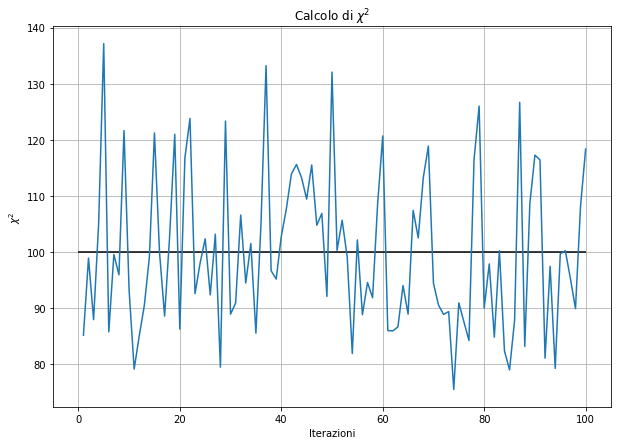

In [3]:
import matplotlib
import matplotlib.pyplot as plt 
import numpy as np

x,y=np.loadtxt("ex_1.01/chi2.out", usecols=(0, 1), unpack=True)

fig=plt.figure(figsize=(10, 7))
plt.errorbar(x,y)
plt.xlabel('Iterazioni')
plt.ylabel('$\chi^2$')
plt.hlines(100, 0, 100)
plt.title("Calcolo di $\chi^2$")
plt.grid(True)
plt.show()

Come si può notare, il valore medio nel calcolo di $\chi^2$ è pari a 100. Il risultato è atteso siccome $(n_i - n/M)^2 \simeq n/M$ e perciò $\chi^2 \simeq 100$. Se si fosse ottenuto un valore maggiore, il livello di confindenza dell'ipotesi di distribuzione uniforme sarebbe stato molto basso. 

# 1.02
Il primo obiettivo dell'esercizio 2 è ottenere due funzioni per generare numeri casuali con una distribuzione esponenziale e una lorentiana. 
    Per fare ciò si utilizza il metodo dell'inversione della funzione cumulativa. Infatti, definendo la funzione cumulativa come $F(x)=\int_{
   -\inf}^x p(x') dx' $ e scelta come $y=y(x)$ la medesima funzione cumulativa $y=F_x(x)$, a partire da $p_y(y)=p_x(x)|(\frac{dF_x(x)}{dx})|^{-1}$, si ottiene che $p_y(y)=1$. Perciò, una volta che $F_x(x)$ è nota e invertibile analiticamente è possibile ottenere una variabile $x=F^{-1}(y)$ distribuita come $p_x(x)$, da una variabile casuale distribuita uniformemente tra $[0,1)$ (ovvero y).
   
Da questo risultato possiamo quindi calcolare le funzioni cumulative della distribuzione esponenziale e lorentziana e ricavare in seguito l'espressione di x in funzione di y.

##### Esponenziale: 
Sia $p_x(x)=\lambda exp(-\lambda x)$ con $0\le x < \inf $. Calcolando la funzione cumulativa si ottiene che $$F_x(x)=\int_0^x \lambda exp(-\lambda x) = 1-exp(-\lambda x)$$
dal quale segue che è possibile campionare una variabile $x$ con una distribuzione esponenziale come $$x=-\frac{1}{\lambda}\log(1-y)$$

##### Lorentziana:
Partendo da $p_x(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$
e seguendo il medesimo procedimento si ottiene che $$x=\Gamma \tan[\pi(y-\frac{1}{2})]+\mu$$







Nella seconda parte dell'esercizio testiamo il teorema del limite centrale, il quale asserisce che la somma $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ di variabili casuali $x_i$ estratte secondo una distribuzione con media $\mu$ e varianza $\sigma^2<\infty$, per $N -> \infty$, tende ad una distribuzione gaussiana con medesime valor medio e varianza.
Come mostrato in seguito, le distribuzioni di probabilità uniforme ed esponenziale tendono ad una gaussiana, appartenendo al suo bacino di attrazione e soddisfando le ipotesi del teorema del limite centrale. Diversamente, la distribuzione lorentziana, non soddisfa la condizione $\sigma^2<\inf$ e difatti, all'aumentaare di $N$, non tende ad una gaussiana, ma risulta stabile(la distribuzione limite è la lorentiana stessa).
 
In seguito sono riportati 3 gruppi di istogrammi, ottenuti con la realizzazione di $10^4$ stime di $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ per $N=1, 2, 10, 100$. 

Come detto precedentemente, si può notare che al crescere di $N$ la distribuzione uniforme e esponenziale assomigliano sempre più ad una gaussiana. Infine per $N=100$ è stato effettuato un fit con una gaussiana per le prime due distribuzioni e con una lorentziana per l'ultima. 


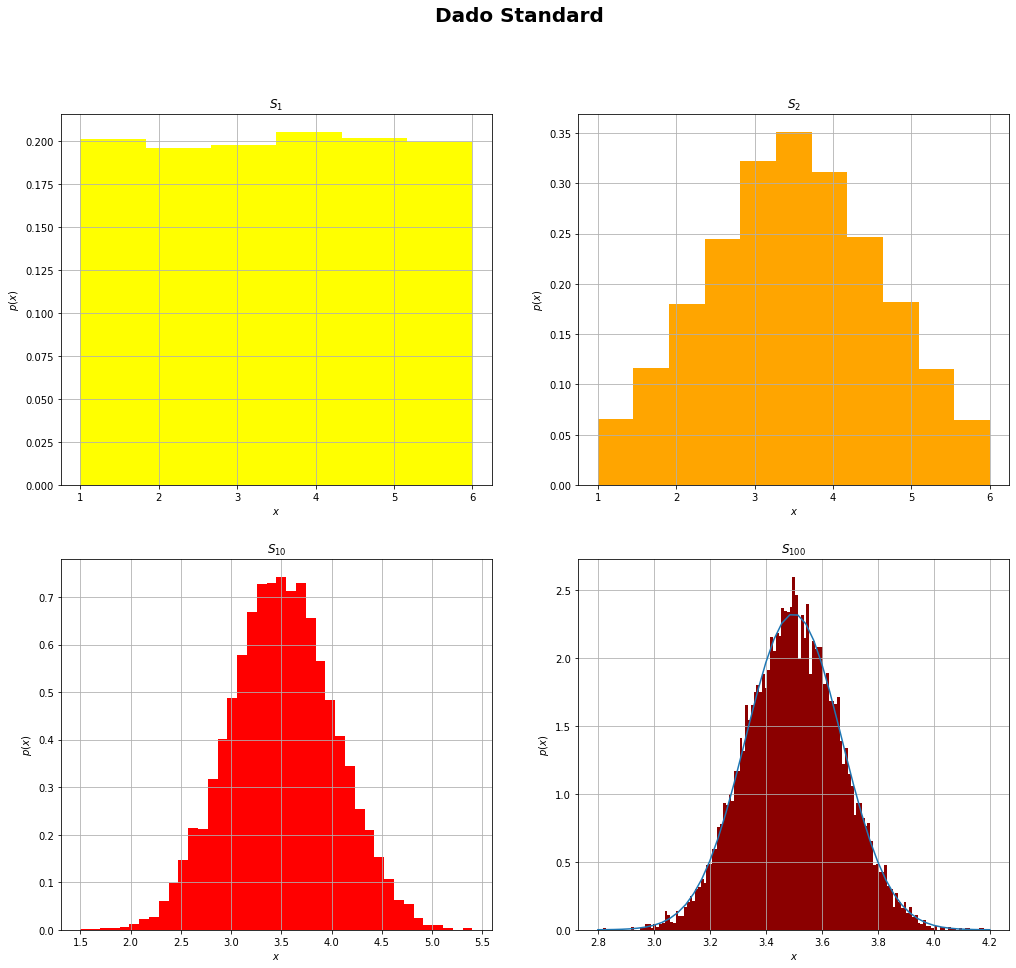

In [1]:
import matplotlib
import matplotlib.pyplot as plt 
import numpy as np
from scipy.stats import norm

s1=np.loadtxt("ex_1.02/unif_dice.out", skiprows=0, max_rows=10000, unpack=True)
s2=np.loadtxt("ex_1.02/unif_dice.out", skiprows=10000, max_rows=10000, unpack=True)
s10=np.loadtxt("ex_1.02/unif_dice.out", skiprows=20000, max_rows=10000, unpack=True)
s100=np.loadtxt("ex_1.02/unif_dice.out", skiprows=30000, max_rows=10000, unpack=True)

fig=plt.figure(figsize=(17, 15))
plt.suptitle("Dado Standard", fontsize=20, fontweight="bold")

#1
plt.subplot(221)
plt.hist(s1,6, color='yellow', density=True)
plt.title('$S_1$',)
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.grid(True)

#1
plt.subplot(222)
plt.hist(s2,11, color='orange', density=True)
plt.title('$S_2$')
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.grid(True)

#1
plt.subplot(223)
plt.hist(s10,40, color='red', density=True)
plt.title('$S_{10}$')
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.grid(True)

#1
plt.subplot(224)
plt.hist(s100,137, color='darkred', density=True)
plt.title('$S_{100}$')
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.grid(True)

#fit
parameter=norm.fit(s100)
x=np.linspace(2.8,4.2)
y=norm.pdf(x, *parameter)
plt.plot(x,y)
plt.show()



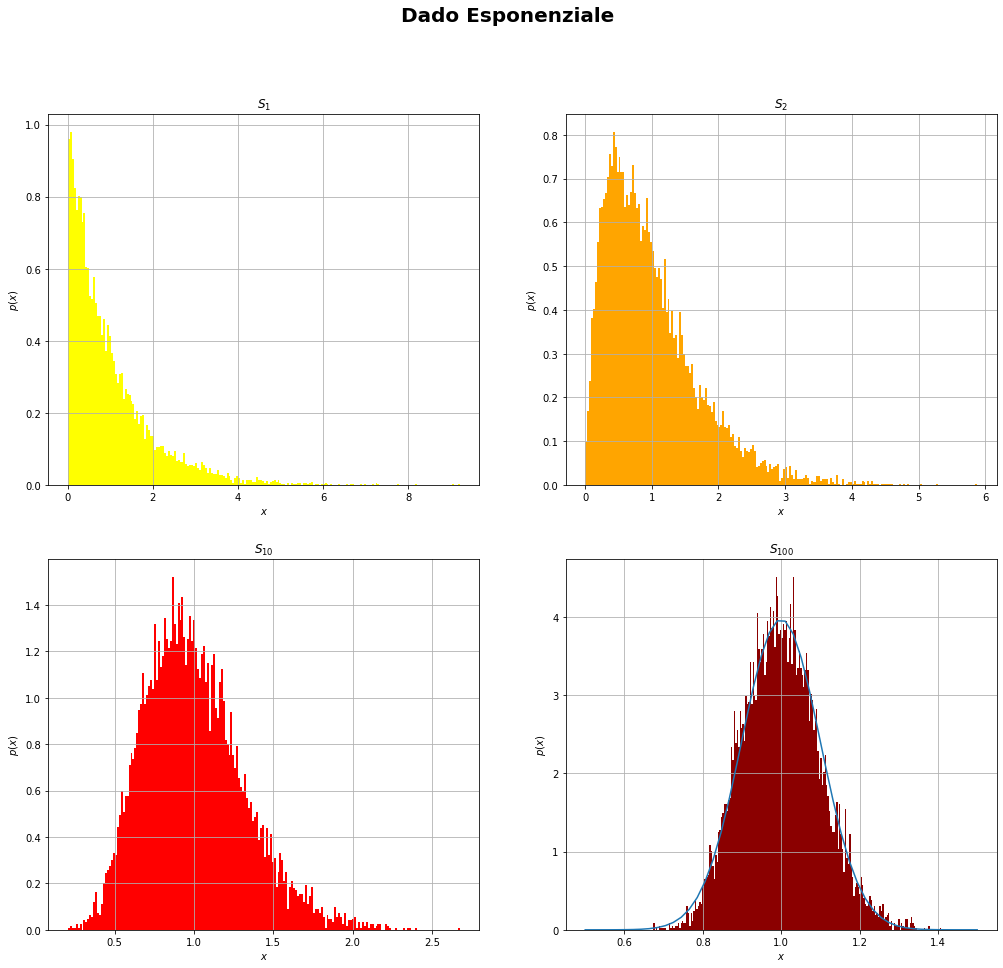

In [2]:
import matplotlib
import matplotlib.pyplot as plt 
import numpy as np
from scipy.stats import norm

s1=np.loadtxt("ex_1.02/expo_dice.out", skiprows=0, max_rows=10000, unpack=True)
s2=np.loadtxt("ex_1.02/expo_dice.out", skiprows=10000, max_rows=10000, unpack=True)
s10=np.loadtxt("ex_1.02/expo_dice.out", skiprows=20000, max_rows=10000, unpack=True)
s100=np.loadtxt("ex_1.02/expo_dice.out", skiprows=30000, max_rows=10000, unpack=True)

fig=plt.figure(figsize=(17, 15))
plt.suptitle("Dado Esponenziale", fontsize=20, fontweight="bold")

#1
plt.subplot(221)
plt.hist(s1,200, color='yellow', density=True)
plt.title('$S_1$')
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.grid(True)

#1
plt.subplot(222)
plt.hist(s2,200, color='orange', density=True)
plt.title('$S_2$')
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.grid(True)

#1
plt.subplot(223)
plt.hist(s10,200, color='red', density=True)
plt.title('$S_{10}$')
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.grid(True)

#1
plt.subplot(224)
plt.hist(s100,200, color='darkred', density=True)
plt.title('$S_{100}$')
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.grid(True)

#fit
parameter=norm.fit(s100)
x=np.linspace(0.5,1.5)
y=norm.pdf(x, *parameter)
plt.plot(x,y)
plt.show()



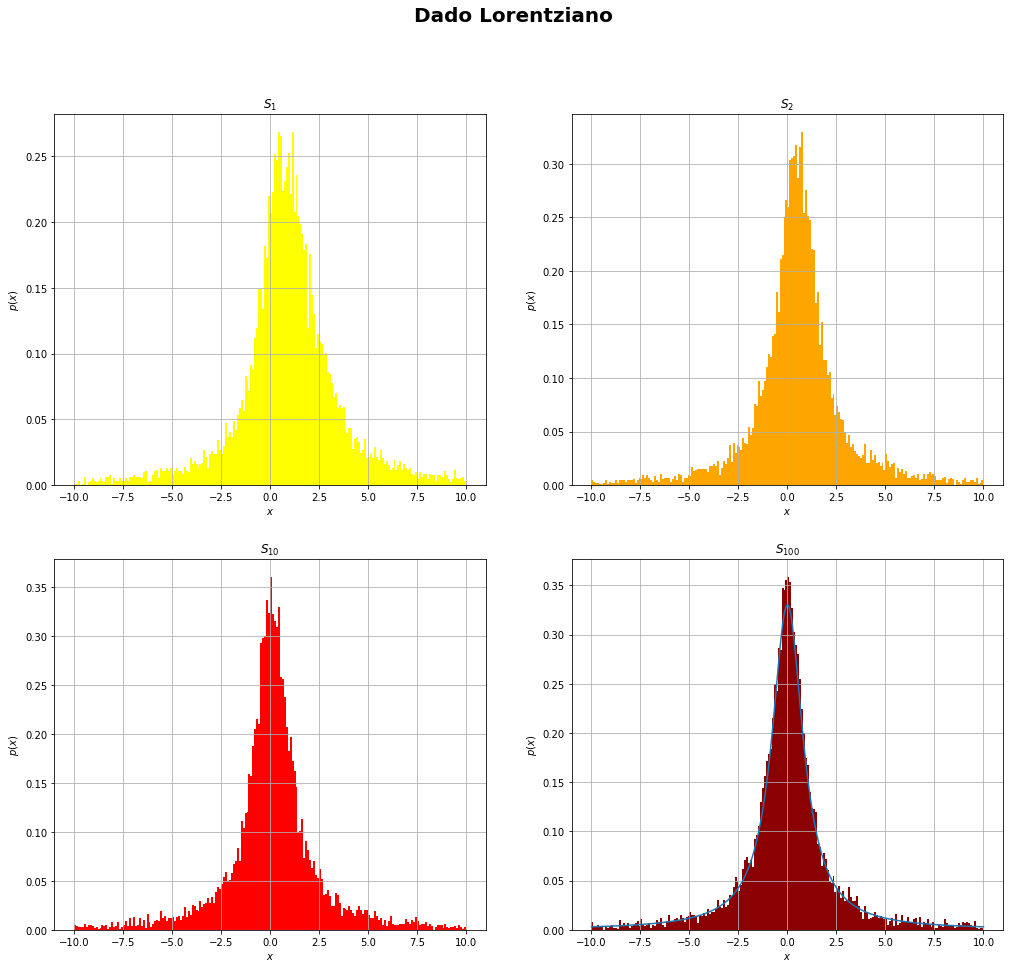

In [5]:
import matplotlib
import matplotlib.pyplot as plt 
import numpy as np
from scipy.stats import cauchy

s1=np.loadtxt("ex_1.02/lore_dice.out", skiprows=0, max_rows=10000, unpack=True)
s2=np.loadtxt("ex_1.02/lore_dice.out", skiprows=10000, max_rows=10000, unpack=True)
s10=np.loadtxt("ex_1.02/lore_dice.out", skiprows=20000, max_rows=10000, unpack=True)
s100=np.loadtxt("ex_1.02/lore_dice.out", skiprows=30000, max_rows=10000, unpack=True)

fig=plt.figure(figsize=(17, 15))
plt.suptitle("Dado Lorentziano", fontsize=20, fontweight="bold")

#1
plt.subplot(221)
plt.hist(s1,200, range=(-10,10), color='yellow', density=True)
plt.title('$S_1$')
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.grid(True)

#1
plt.subplot(222)
plt.hist(s2,200, range=(-10,10), color='orange', density=True)
plt.title('$S_2$')
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.grid(True)

#1
plt.subplot(223)
plt.hist(s10,200, range=(-10,10), color='red', density=True)
plt.title('$S_{10}$')
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.grid(True)

#1
plt.subplot(224)
plt.hist(s100,200, range=(-10,10), color='darkred', density=True)
plt.title('$S_{100}$')
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.grid(True)

#fit
parameter=cauchy.fit(s100)
x=np.linspace(-10,10,200)
y=cauchy.pdf(x, *parameter)
plt.plot(x,y)
plt.show()

# 1.03
## Esperimento di Buffon
L'esperimento di Buffon consiste nello stimare il valore di $\pi$, lanciando in modo casuale degli aghi di lunghezza $L$ su una griglia a righe parallele distanziate di un valore pari a $d$. Dato $d>L$, la probabilità che un ago lanciato intersechi una riga è data dal prodotto delle probabilità $P_1=\frac{L}{d}$ e $P_2=\frac{2}{\pi}$; rispettivamente sono le probabilità che il centro dell'ago cada ad una distanza minore di $\frac{L}{2}$ da una riga e la probabilità che l'angolo fra la direzione dell'ago sia tale da permettere l'intersezione fra la riga e l'ago. Perciò si ottiene la probabilità di intersezione pari a $P=P_1P_2=\frac{2L}{d\pi}$ da cui segue $\pi=\frac{2L}{Pd}$.  

In seguito viene calcolato il valore di $\pi$ e relativa incertezza (utilizzando il metodo a blocchi), partendo dalla stima di p come $\frac{N_{hit}}{N_{throw}}$.

   Per fare ciò, associo una coppia di variabili per ogni lancio $(x_0,\theta$). Il problema, grazie alle sue simmetrie, può essere riportato in una sola area rappresentata dalla distanza fra due righe. Estraggo uniformemente fra $[0,d)$ il valore $x_0$ dell'ascissa del centro. In seguito estraggo, sempre uniformemente la coppia di variabili (x, y) all'interno della circonferenza unitaria. Da queste ricavo il valore di $\theta$ distribuito uniformente fra $(\frac{-\pi}{2}, \frac{\pi}{2})$ attraverso la funzione $arctan(\frac{y}{x})$.
  
Infine, conto i lanci che soddisfano $L/2-cos(\theta)<0$ oppure $L/2+cos(\theta)>d$. 
Dal rapporto $N_{hit}/N_{throw}$ ottenendo il valore di $P$ con la sua incertezza trovata con il metodo a blocchi. 
   
Infine, viene graficato il valore di $\pi$ con la sua incertezza, ottenuta con una propagando l'errore su $P$, in funzione del numero di lanci.





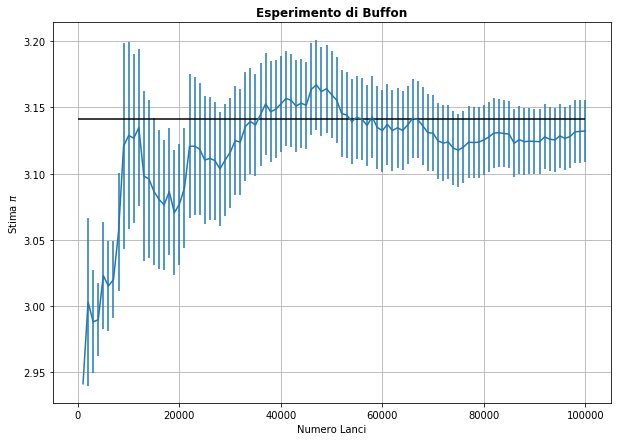

In [15]:
import matplotlib
import matplotlib.pyplot as plt 
import numpy as np

x,y,err=np.loadtxt("ex_1.03/pi.out", usecols=(0, 1, 2), unpack=True)

fig=plt.figure(figsize=(10, 7))
plt.errorbar(x,y,yerr=err)
plt.hlines(3.14159, 0, 100000)
plt.xlabel('Numero Lanci')
plt.ylabel('Stima $\pi$')
plt.title("Esperimento di Buffon", fontweight="bold")
plt.grid(True)
plt.show()